In [5]:
from py2neo import Graph
import pandas as pd
import os

import matplotlib.pyplot as plt

# host + port
host = 'http://localhost:7474'

# select database name
#db_name = 'modelparallel'
db_name = 'pagerank'

# credentials for API
user = 'neo4j'
passwd = '1234'

model_graph = Graph(host, auth=(user, passwd), name=db_name)

# Connected Components

### Test auf SCC 

CALL gds.alpha.scc.write({
  nodeProjection: 'Molecule',
  relationshipProjection: 'HAS_TRANSFORMED_INTO',
  writeProperty: 'HTI_SCC'
})
YIELD setCount, maxSetSize, minSetSize;

### Test auf WCC

#### erstelle graph projection

CALL gds.graph.create(
 "HTI-Graph",
 "Molecule",
 "HAS_TRANSFORMED_INTO"
)

#### teste wcc

CALL gds.wcc.write('HTI-Graph', { writeProperty: 'HTI_WCC' })
YIELD nodePropertiesWritten, componentCount;

In [96]:
# test der HTI wcc Komponenten

model_graph.run("""
MATCH (m:Molecule)
WITH m.HTI_WCC as wcc, collect(m.formula_string) as fs
WHERE size(fs) > 10
RETURN wcc, fs ORDER BY size(fs) DESC
""").to_data_frame()

,wcc,fs
0,11,"[C10 H10 N2 O2, C10 H10 N2 O2, C10 H10 N2 O3, ..."
1,12,"[C10 H11 N5 O1 S2, C10 H11 N5 O1 S2, C10 H11 N..."
2,396,"[C10 H14 N4 O10 S1, C10 H14 N4 O10 S1, C10 H14..."
3,1437,"[C11 H13 N3 S3, C11 H15 N3 S3, C11 H15 N3 S3, ..."
4,724,"[C10 H11 N1 O1 S2, C10 H11 N1 O1 S2, C10 H11 N..."
5,56465,"[C10 H18 N2 O10 S2, C10 H18 N2 O7 S2, C10 H18 ..."
6,701,"[C13 H13 N5 S3, C13 H15 N5 O1 S3, C13 H15 N5 S..."
7,1682,"[C14 H13 N5 O4 S1, C16 H15 N5 O4 S1, C16 H15 N..."
8,3137,"[C14 H28 O5 S1, C14 H28 O6 S1, C14 H30 O3 S1, ..."
9,57874,"[C14 H28 O5 S1, C14 H28 O5 S1, C14 H28 O5 S1, ..."


In [111]:
# test der CTI wcc Komponenten

model_graph.run("""
MATCH (m:Molecule)
WITH m.CTI_WCC as wcc, collect(m.formula_string) as fs
WHERE size(fs) > 10
RETURN wcc, fs ORDER BY size(fs) DESC
""").to_data_frame()

,wcc,fs
0,0,"[C10 H10 N2 O2, C10 H10 N2 O2, C10 H10 N2 O2, ..."
1,53,"[C15 H18 S3, C15 H20 S3, C15 H22 S3, C16 H18 O..."
2,2122,"[C10 H10 N4 O2 S3, C5 H2 N4 O1 S3, C5 H2 N4 O1..."
3,20602,"[C24 H34 N2 O19 S1, C25 H32 N2 O19 S1, C25 H34..."
4,19,"[C15 H16 N2 S2, C17 H18 N2 S2, C17 H18 N2 S2, ..."
5,53505,"[C10 H15 N5 O12, C10 H17 N5 O10, C10 H17 N5 O1..."
6,3605,"[C10 H10 O2 S3, C10 H10 O2 S3, C10 H10 O2 S3, ..."
7,197,"[C10 H10 O2 S3, C10 H10 O2 S3, C10 H10 O2 S3, ..."
8,71524,"[C10 H21 N5 O10, C10 H21 N5 O9, C10 H23 N5 O10..."
9,589,"[C26 H38 N2 O16 S1, C26 H42 N2 O14 S1, C27 H40..."


# PageRank

In [30]:
# pagerank hpt graph

# CALL gds.graph.create('pagerank_hpt', 'Molecule', 'HAS_POSSIBLE_TRANSFORMATION')
# CALL gds.pageRank.write('pagerank_hpt', {maxIterations: 20, dampingFactor: 0.85, writeProperty: 'pagerank_hpt'})

model_graph.run("""
MATCH (m:Molecule)
RETURN m.formula_string, m.pagerank_hpt, m.measurement_id
ORDER BY m.pagerank_hpt
DESC LIMIT 20
""").to_data_frame()

# welche Moleküle haben den höchsten PageRank über alle Zeitpunkte
# C6 H4 O5
# C6 H5 N1 O4
# C4 H9 N5 O4 S2

,m.formula_string,m.hpt,m.measurement_id
0,C6 H4 O5,101.153883,7857
1,C6 H4 O5,98.972053,7839
2,C6 H4 O5,96.351481,7868
3,C6 H4 O5,95.346175,7833
4,C6 H5 N1 O4,95.073548,7857
5,C6 H5 N1 O4,94.261669,7839
6,C6 H4 O5,93.122625,7863
7,C6 H5 N1 O4,92.387724,7868
8,C6 H5 N1 O4,91.737912,7833
9,C6 H4 O5,90.503748,7874


In [32]:
# pagerank hti graph

model_graph.run("""
MATCH (m:Molecule)
RETURN m.formula_string, m.pagerank_hti, m.measurement_id
ORDER BY m.pagerank_hti
DESC LIMIT 20
""").to_data_frame()

# welche Moleküle haben den höchsten PageRank
# C11 H4 O9
# C13 H9 N1 O8
# C20 H12 O13

# Moleküle am Ende des Graphen haben einen höheren PageRank

,m.formula_string,m.pagerank_hti,m.measurement_id
0,C11 H4 O9,5.881338,7868
1,C13 H9 N1 O8,4.726515,7874
2,C20 H12 O13,4.715841,7868
3,C17 H13 N1 O8,4.655010,7874
4,C13 H7 N1 O8,4.607175,7868
5,C4 H9 N5 O2 S2,4.476103,7874
6,C5 H10 N4 O4 S1,4.121299,7874
7,C28 H24 O16,4.046388,7874
8,C4 H9 N5 O2 S2,3.888147,7868
9,C5 H9 N5 O4 S2,3.840616,7863


# Betrachtung der einzigartigen Moleküle als Graph mit HTI Kanten


- alle 18.922 einzigartigen Moleküle werden als seperater Graph gespeichert (weglassen der temporalen Komponente)
- die HTI Kanten vom temporalen Modell werden übertragen
- d.h. hat ein Molekül im temporalen Modell mehrere HTI Kanten vom selben Molekül hat es diese auch im statischen

In [4]:
# Wie viele einzigartige Moleküle haben keine HTI Beziehung (weder eingehend noch ausgehend)
# 9349 von 18.922 Molekülen haben weder im statischen noch im temporalen Modell eine HTI Kante
# d.h. 9573 Moleküle haben mindestens eine HTI Beziehung im Modell (statisch und temporal)

# Code
# MATCH (p:Unique) WHERE NOT (p)-[]-() RETURN count(p)

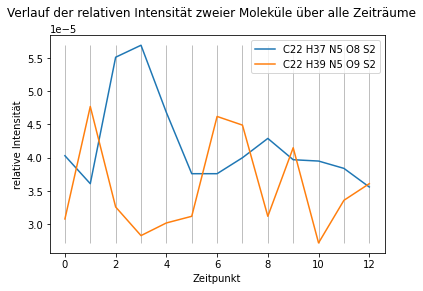

In [33]:
# Verlauf der relativen Intensität zweier Moleküle mit meisten hti Kanten
# C22 H37 N5 O8 S2 und C22 H39 N5 O9 S2

mlc_a = model_graph.run("""
MATCH (u:Unique)
WHERE u.formula_string = "C22 H37 N5 O8 S2"
WITH u.formula_string as fs
MATCH (m:Molecule)-[]-(t:Measurement)
WHERE m.formula_string = fs
RETURN t.timepoint as time, m.peak_relint_tic as int
""").to_data_frame()

#print(mlc_a)

mlc_b = model_graph.run("""
MATCH (u:Unique)
WHERE u.formula_string = "C22 H39 N5 O9 S2"
WITH u.formula_string as fs
MATCH (m:Molecule)-[]-(t:Measurement)
WHERE m.formula_string = fs
RETURN t.timepoint as time, m.peak_relint_tic as int
""").to_data_frame()

#print(mlc_b)

plt.suptitle('Verlauf der relativen Intensität zweier Moleküle über alle Zeiträume')
plt.plot(mlc_a.time, mlc_a.int)
plt.plot(mlc_b.time, mlc_b.int)
plt.vlines(mlc_a.time, ymin=mlc_b.int.min(), ymax=mlc_a.int.max(), colors='grey', linewidth=0.5)
plt.xlabel('Zeitpunkt')
plt.ylabel('relative Intensität')
plt.legend(['C22 H37 N5 O8 S2', 'C22 H39 N5 O9 S2'], loc='upper right')
plt.show()

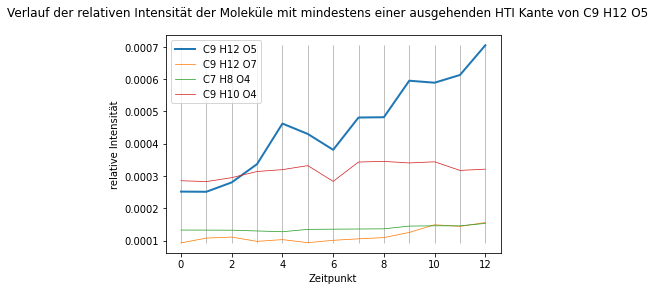

In [51]:
# ausgehende HTI Kanten von C9 H12 O5

mlc_a = model_graph.run("""
MATCH (u:Unique)
WHERE u.formula_string = "C9 H12 O5"
WITH u.formula_string as fs
MATCH (m:Molecule)-[]-(t:Measurement)
WHERE m.formula_string = fs
RETURN t.timepoint as time, m.peak_relint_tic as int
""").to_data_frame()

mlc_b = model_graph.run("""
MATCH (u:Unique)-[h:HTI]->(u1:Unique)
WHERE u.formula_string = "C9 H12 O5"
WITH u.formula_string as from_fs, u1.formula_string as to_fs
MATCH (m:Molecule)-[]-(t:Measurement)
WHERE m.formula_string = to_fs 
RETURN from_fs, to_fs, collect(m.peak_relint_tic) as col_int, collect(t.timepoint) as col_time
""").to_data_frame()

#print(mlc_b)

plt.suptitle('Verlauf der relativen Intensität der Moleküle mit mindestens einer ausgehenden HTI Kante von C9 H12 O5')
plt.plot(mlc_a.time, mlc_a.int, linewidth=2.0)
plt.plot(mlc_b.col_time[0], mlc_b.col_int[0], linewidth=0.75)
plt.plot(mlc_b.col_time[1], mlc_b.col_int[1], linewidth=0.75)
plt.plot(mlc_b.col_time[2], mlc_b.col_int[2], linewidth=0.75)
plt.vlines(mlc_a.time, ymin=9.26e-05, ymax=mlc_a.int.max(), colors='grey', linewidth=0.5)
plt.xlabel('Zeitpunkt')
plt.ylabel('relative Intensität')
plt.legend(['C9 H12 O5', 'C9 H12 O7','C7 H8 O4','C9 H10 O4'], loc='upper left')
plt.show()

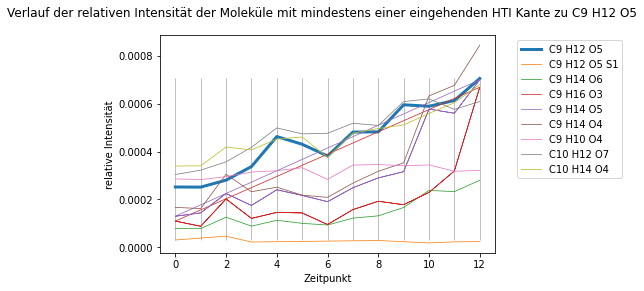

In [65]:
# eingehende HTI Kanten von C9 H12 O5

mlc_a = model_graph.run("""
MATCH (u:Unique)
WHERE u.formula_string = "C9 H12 O5"
WITH u.formula_string as fs
MATCH (m:Molecule)-[]-(t:Measurement)
WHERE m.formula_string = fs
RETURN t.timepoint as time, m.peak_relint_tic as int
""").to_data_frame()

mlc_b = model_graph.run("""
MATCH (u:Unique)<-[h:HTI]-(u1:Unique)
WHERE u.formula_string = "C9 H12 O5"
WITH u.formula_string as from_fs, u1.formula_string as to_fs
MATCH (m:Molecule)-[]-(t:Measurement)
WHERE m.formula_string = to_fs 
RETURN from_fs, to_fs, collect(m.peak_relint_tic) as col_int, collect(t.timepoint) as col_time
ORDER BY col_int[0] ASC
""").to_data_frame()

#print(mlc_b)

plt.suptitle('Verlauf der relativen Intensität der Moleküle mit mindestens einer eingehenden HTI Kante zu C9 H12 O5')
plt.plot(mlc_a.time, mlc_a.int, linewidth=3.0)
plt.plot(mlc_b.col_time[0], mlc_b.col_int[0], linewidth=0.75)
plt.plot(mlc_b.col_time[1], mlc_b.col_int[1], linewidth=0.75)
plt.plot(mlc_b.col_time[2], mlc_b.col_int[2], linewidth=0.75)
plt.plot(mlc_b.col_time[3], mlc_b.col_int[3], linewidth=0.75)
plt.plot(mlc_b.col_time[4], mlc_b.col_int[4], linewidth=0.75)
plt.plot(mlc_b.col_time[5], mlc_b.col_int[5], linewidth=0.75)
plt.plot(mlc_b.col_time[6], mlc_b.col_int[6], linewidth=0.75)
plt.plot(mlc_b.col_time[7], mlc_b.col_int[7], linewidth=0.75)
plt.vlines(mlc_a.time, ymin=3.02e-05, ymax=mlc_a.int.max(), colors='grey', linewidth=0.5)
plt.xlabel('Zeitpunkt')
plt.ylabel('relative Intensität')
plt.legend(['C9 H12 O5', 'C9 H12 O5 S1','C9 H14 O6','C9 H16 O3','C9 H14 O5','C9 H14 O4','C9 H10 O4','C10 H12 O7','C10 H14 O4'], loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

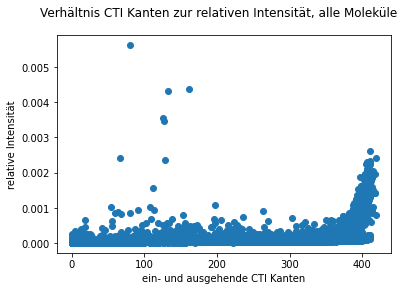

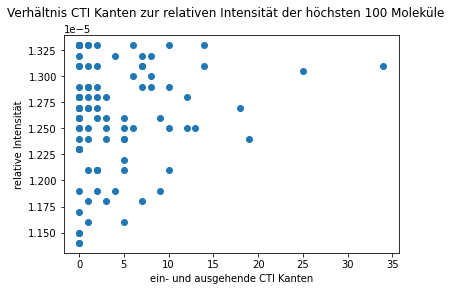

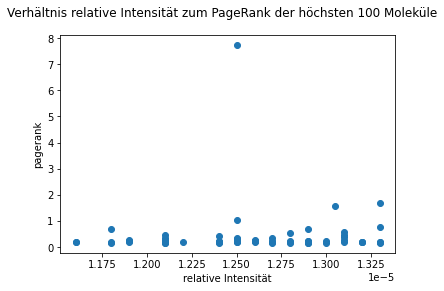

,fs,pagerank
0,C6 H4 O5,102.808649
1,C6 H5 N1 O4,55.058803
2,C4 H9 N5 O4 S2,51.967691
3,C6 H6 O6,46.160857
4,C4 H7 N5 O3 S2,39.523386
5,C7 H5 N1 O6,35.831853
6,C7 H4 O7,30.505440
7,C4 H9 N5 O3 S2,22.254231
8,C6 H6 O5,16.190375
9,C4 H7 N5 O4 S2,15.735697


In [4]:
# Verbindung zwischen CTI Kanten und Intensität im Datensatz

avg_int = model_graph.run("""
MATCH (m:Molecule)
//RETURN m.formula_string, avg(m.peak_relint_tic) as avg ORDER BY avg DESC LIMIT 10
WITH m.formula_string as fs, avg(m.peak_relint_tic) as avg_int
OPTIONAL MATCH (u:Unique)-[h:CTI]->(:Unique)
WHERE u.formula_string = fs
WITH fs, avg_int, count(h) as c_aus
OPTIONAL MATCH (u:Unique)<-[h2:CTI]-(:Unique)
WHERE u.formula_string = fs
WITH fs, avg_int, c_aus, count(h2) as c_ein, u.pagerank_cti as pr
RETURN fs, avg_int, c_aus, c_ein, c_aus + c_ein as c_ges, pr
ORDER BY avg_int ASC
""").to_data_frame()

plt.suptitle('Verhältnis CTI Kanten zur relativen Intensität, alle Moleküle')
plt.scatter(avg_int.c_ges, avg_int.avg_int)
plt.xlabel('ein- und ausgehende CTI Kanten')
plt.ylabel('relative Intensität')
plt.show()

avg_tmp = avg_int.head(100)
plt.suptitle('Verhältnis CTI Kanten zur relativen Intensität der höchsten 100 Moleküle')
plt.scatter(avg_tmp.c_ges, avg_tmp.avg_int)
plt.xlabel('ein- und ausgehende CTI Kanten')
plt.ylabel('relative Intensität')
plt.show()

avg_tmp = avg_int.head(100)
plt.suptitle('Verhältnis relative Intensität zum PageRank der höchsten 100 Moleküle')
plt.scatter(avg_tmp.avg_int, avg_tmp.pr)
plt.xlabel('relative Intensität')
plt.ylabel('pagerank')
plt.show()

model_graph.run("""
MATCH (u:Unique)
RETURN u.formula_string as fs, u.pagerank_cti as pagerank
ORDER BY pagerank DESC LIMIT 20
""").to_data_frame()

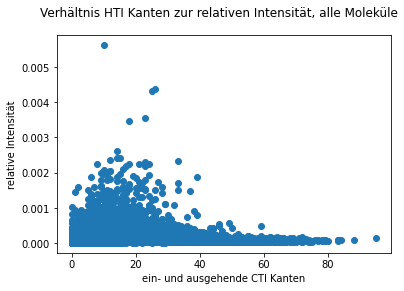

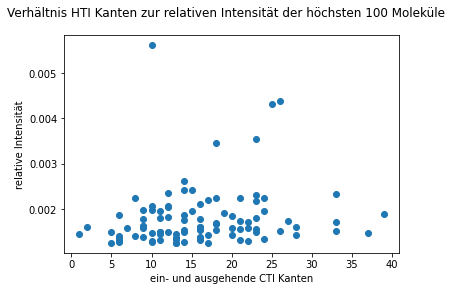

In [97]:
# Verbindung zwischen HTI Kanten und Intensität im Datensatz

avg_int = model_graph.run("""
MATCH (m:Molecule)
//RETURN m.formula_string, avg(m.peak_relint_tic) as avg ORDER BY avg DESC LIMIT 10
WITH m.formula_string as fs, avg(m.peak_relint_tic) as avg_int
OPTIONAL MATCH (u:Unique)-[h:HTI]->(:Unique)
WHERE u.formula_string = fs
WITH fs, avg_int, count(h) as c_aus
OPTIONAL MATCH (u:Unique)<-[h2:HTI]-(:Unique)
WHERE u.formula_string = fs
WITH fs, avg_int, c_aus, count(h2) as c_ein
RETURN fs, avg_int, c_aus, c_ein, c_aus + c_ein as c_ges 
ORDER BY avg_int DESC
""").to_data_frame()

plt.suptitle('Verhältnis HTI Kanten zur relativen Intensität, alle Moleküle')
plt.scatter(avg_int.c_ges, avg_int.avg_int)
plt.xlabel('ein- und ausgehende HTI Kanten')
plt.ylabel('relative Intensität')
plt.show()

avg_tmp = avg_int.head(100)
plt.suptitle('Verhältnis HTI Kanten zur relativen Intensität der höchsten 100 Moleküle')
plt.scatter(avg_tmp.c_ges, avg_tmp.avg_int)
plt.xlabel('ein- und ausgehende HTI Kanten')
plt.ylabel('relative Intensität')
plt.show()